# Model Selection

We will examine subset selection by trying to predict the Salary of baseball players using a number of statistics associated with performance from the previous year.


In [2]:
library(ISLR) #load ISLR package which contains datasets "Hitters"
?Hitters

Hitters {ISLR},R Documentation


In [3]:
dim(Hitters) # the dimensions of the data

[1] 322  20

In [3]:
sum(is.na(Hitters$Salary)) # but if you inspect Salary, you will find 59 missing observations

[1] 59

In [6]:
Hitters=na.omit(Hitters) #so we have to remove them
dim(Hitters)

[1] 263  20

## Subset Selection

### Best Subset
The "leaps" library contains the regsubset() function which performs best subset selection.

Here, "best" is determined by RSS (so only training data) for a **given** number of parameters.

In [6]:
library(leaps)

regfit.full= regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

So for each subset size, regsubset() gives us the best performing model fpor a **given** numbr of parameters. 

For models of size, 1, the best model uses "CRBI". For models of size 2, the best model uses "Hits" and "CRBI"

Note that it defaults to models up to size 8 predictors. To use the full set of predictors:

In [7]:
regfit.full= regsubsets(Salary~.,Hitters,nvmax=19)
reg.summary=summary(regfit.full)

In [8]:
names(reg.summary) # summary also reports R-squared, RSS, R-squared-adjusted, C_p, BIC etc....

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [9]:
reg.summary$rsq #R-squared. Notice it is increasing as more variables are added...

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

### Plot RSS and Adjusted $R^2$, $C_p$, and BIC

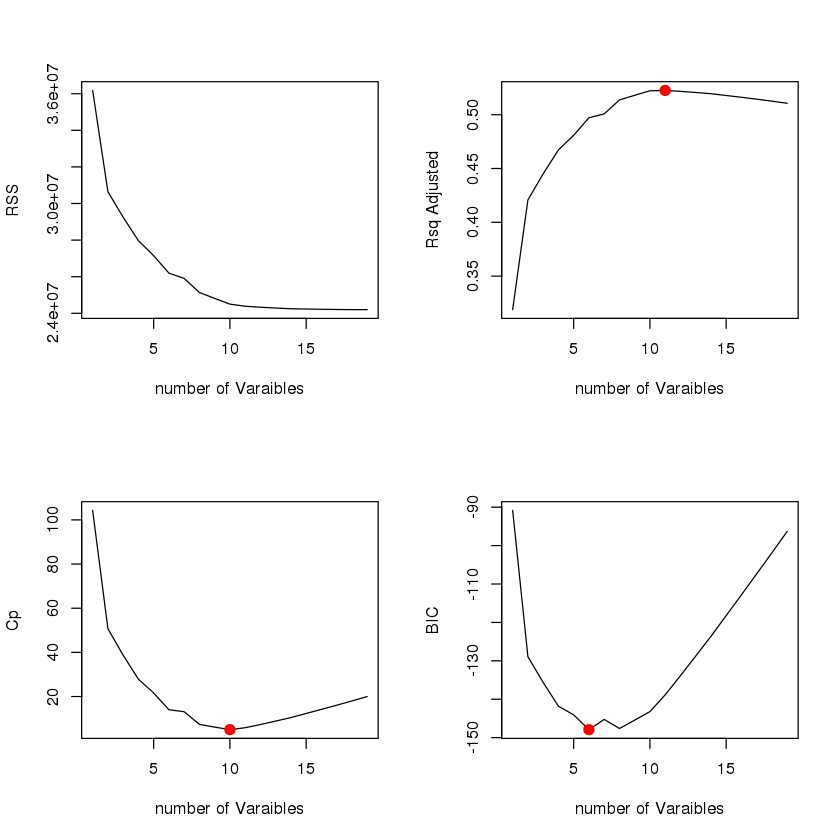

In [10]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="number of Varaibles",ylab="RSS",type="l")
plot(reg.summary$adjr2, xlab="number of Varaibles",ylab="Rsq Adjusted",type="l")
ind<-which.max(reg.summary$adjr2)
points(ind,reg.summary$adjr2[ind],col="red",cex=2,pch=20) #plot a red dot at maximum Adjusted R2

plot(reg.summary$cp, xlab="number of Varaibles",ylab="Cp",type="l")
ind<-which.min(reg.summary$cp) # find the location of the minimum Cp
points(ind,reg.summary$cp[ind],col="red",cex=2,pch=20) #plot a red dot at minimum Cp

plot(reg.summary$bic, xlab="number of Varaibles",ylab="BIC",type="l")
ind<-which.min(reg.summary$bic) # find the location of the minimum BIC
points(ind,reg.summary$bic[ind],col="red",cex=2,pch=20) #plot a red dot at minimum BIC

### Plot Results directly

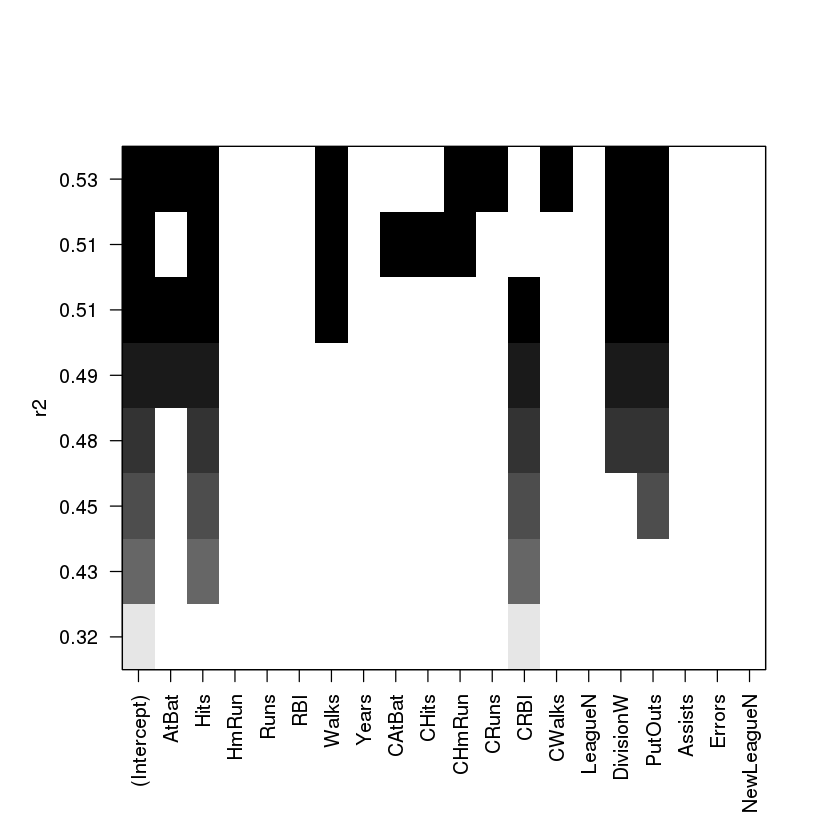

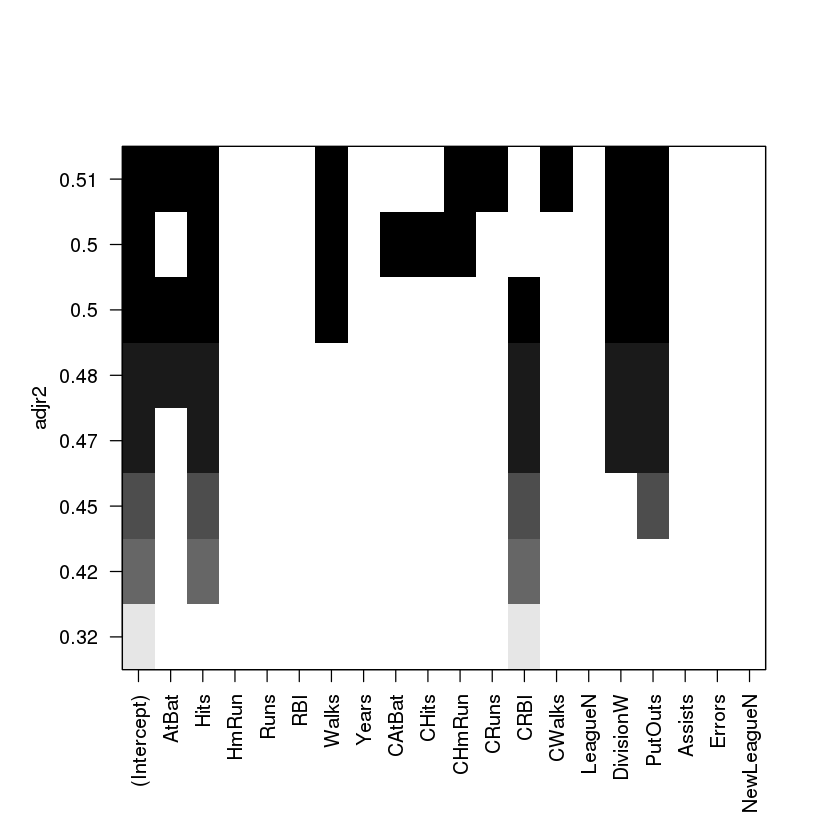

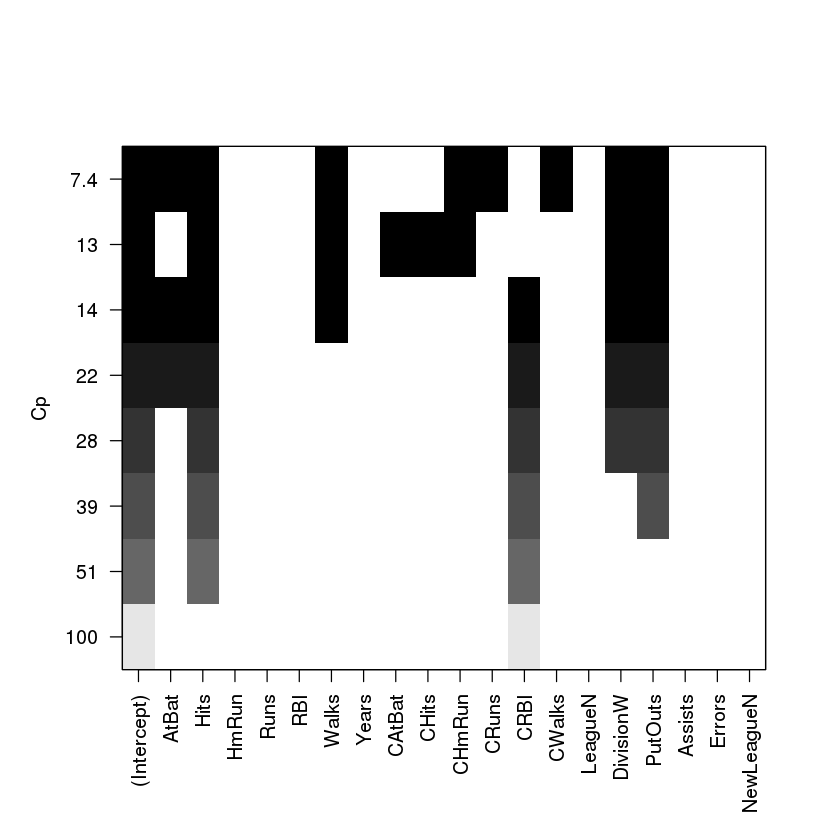

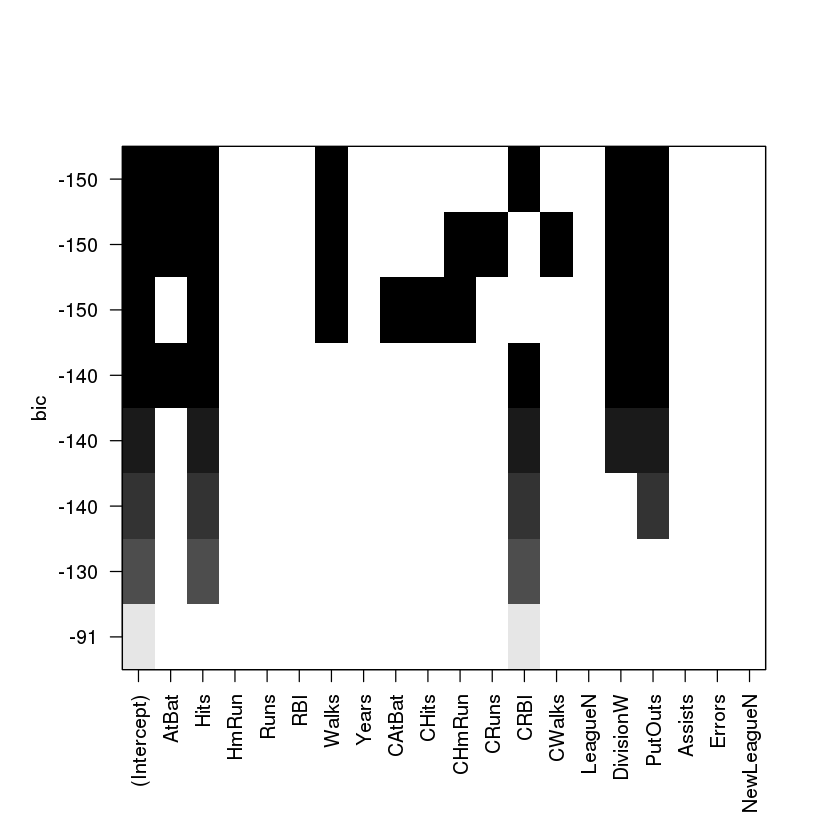

In [127]:
plot(regfit.full,scale="r2")
plot(regfit.full,scale="adjr2")
plot(regfit.full,scale="Cp")
plot(regfit.full,scale="bic")

Lowest BIC is model in top row. Contains AtBat, Hits, Walks, CRBI, DivisionW and OutOuts.

We can view the coefficients from this model:

In [128]:
coef(regfit.full,6) # the coefficients associated with the 6 variable model

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Selection

In [129]:
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


Notice that at the 7th variable, the results from forward, backward and best subset start to differ.

In [130]:
coef(regfit.full,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

**Career RBI is in the best forward model, because it had the most explanatory power by itself. But it is not in the backward or best subset selection**

In [131]:
coef(regfit.fwd,7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [132]:
coef(regfit.bwd,7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Validation Set and Cross Validation

The previous methods chose among models by adjusting the RSS. However we can use cross-validation to **estimate** the test error.

Here, we will use Validation Set cross-validation in which we **use only the training data** to perform model fitting and use the test dataset for variable selection. This helps us guard against over-fitting.

In [14]:
set.seed(1)
train=sample(c(TRUE,FALSE),nrow(Hitters),rep=TRUE) #randomly assign, for each observation, and object to training sample (TRUE) or not (FALSE)
test=(!train)

### Run best subset on training sample

In [18]:
regfit.best.train=regsubsets(Salary~.,data=Hitters[train,],nvmax=19) #run on ONLY training sample
summary(regfit.best.train)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters[train, ], nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   "*"  " "   " "  " " " "   " "   " "    " "   " "    " "   " " 
2  ( 1 )  

### Compute Validation Set Error

There is no predict() method for regsubsets, so we have to calculate the predictions (and MSE) ourselves. 


In [19]:
test.mat=model.matrix(Salary~.,data=Hitters[test,]) #build the "X" matrix for the test data

val.errors=rep(NA,19)

#there is no predict() method for regsubsets, so we have to calculate it ourselves. This code is replaced below with a function predict()
for(i in 1:19){ #for each  model size
    coefi=coef(regfit.best.train,id=i) #get the best fitting coefficients
    pred=test.mat[,names(coefi)]%*%coefi  #multiply them into the columns of the test data to get predictions
    val.errors[i]=mean((Hitters$Salary[test]-as.vector(pred))^2) #calculate the MSE
    }
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [20]:
which.min(val.errors)

[1] 10

Coefficients form model on training dataset

In [26]:
coef(regfit.best.train,which.min(val.errors))

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

### Report Coefficients from Validation Set

The last step is to report the coefficients of the 10 variable model. However, we don't use the coefficients from the training set only. This is because they are noisier (and only use half the data).

Instead, we do best subset selection to get the best 10 variable model from the full dataset. Note that the variables in the best 10 variable model might **change**.

In [27]:
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19) #run on FULL
coef(regfit.full,which.min(val.errors))

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

### Compute k-fold Cross Validation Error

Instead of Validation Set, we can do k-fold cross validation. First, lets write a function to calculate predicted values on the test dataset from the results of regsubsets(). 

This function just implements the code above from the validation set exercise. 

In [139]:
predict.regsubsets=function(object,newdata,id,...){
    form=as.formula(object$call[[2]])
    
    mat=model.matrix(form,newdata)
    coefi=coef(object,id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

To perform cross-validation at each model size, we have to do best subset selection within each of the $k$ training sets.

First, ceate a vector that allocates observations to one of the $k=10$ folds

In [140]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE) #sample into folds
cv.errors=matrix(NA,k,19,dimnames=list(NULL,paste(1:19))) #create a amtrix to store the results

A for loop performs the cross validation

In [141]:
for(j in 1:k){
    best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
    for (i in 1:19){
        pred=predict(best.fit,Hitters[folds==j,],id=i)
        cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

In [142]:
mean.cv.errors=apply(cv.errors,2,mean) #average over columns of matrix
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

In [143]:
which.min(mean.cv.errors)

11 
11

Again, we estimate on the full dataset (with best subset) to obtain the 11 variable model

In [22]:
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19) #run on FULL
coef(regfit.best,which.min(mean.cv.errors))

ERROR: Error in which.min(mean.cv.errors): object 'mean.cv.errors' not found


## Ridge Regression and LASSO

We can use the glmnet() function to implement these methods.

But it has different syntax than previous methods...

In [8]:
x=model.matrix(Salary~.,Hitters)[,-1] #this creates a matrix of predictors, and converts all the categorical variables to dummy variables
# the [,-1] indexing removes the intercept from the matrix. We do this because it will be added back automatically in later methods
y=Hitters$Salary #create the response variable

### Ridge Regression

In [9]:
library(glmnet)

grid=10^seq(10,-2,length=100) #create grid values for lambda from 10^10 to 10^-2
ridge.mod=glmnet(x,y,alpha=0,lambda=grid) #implements ridge regression when alpha=0

For each $\lambda$, there is a vector of ridge regression coefficients

In [10]:

dim(coef(ridge.mod))

[1]  20 100

When $\lambda=11,498$

In [154]:
ridge.mod$lambda[50]

[1] 11497.57

the coefficents, along with the $l_2$ norm are:

In [155]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

The $l_2$-norm is

In [157]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

In contrast, we can look at a smaller $\lambda$ (i.e. a looser constraint). The $l_2$-norm will be bigger

In [160]:
ridge.mod$lambda[60]

[1] 705.4802

In [159]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [161]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 57.11001

In [163]:
predict(ridge.mod,s=100,type="coefficients")[1:20,] # predict at another value of lambda, say lambda=100, given current estimates

(Intercept)         AtBat          Hits         HmRun          Runs 
 2.124749e+01 -1.143526e-01  1.388857e+00 -7.097177e-01  1.163539e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.455760e-01  2.186674e+00 -2.856051e+00  9.398768e-03  8.205608e-02 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 5.385468e-01  1.655780e-01  1.754472e-01 -4.182522e-02  3.676542e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.086578e+02  2.275307e-01  7.689081e-02 -2.630586e+00  6.796074e-03

### Estimate Test Error for Ridge and LASSO

First, we construct the training set

In [164]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2) #generate a random index of half of the data, to use as training set
test=(-train) #index for test set
y.test=y[test] #form test set

Then estimate Ridge Regression and calculcate $MSE_{test}$. We first examine an arbitrary model that uses $\lambda=4$

In [167]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12) #estimate ridge regression on training data
ridge.pred=predict(ridge.mod,s=4,newx=x[test,]) #generate predicted values on test data using lambda=4 (note this use the predict funciton we wrote above)
mean((ridge.pred-y.test)^2) #calculate the MSE on the test set

[1] 101036.8

We can compare this to just using the mean of the training data to predict the test data (i.e. a model with just an intercept)

In [169]:
mean((mean(y[train])-y.test)^2)

[1] 193253.1

Or similarly, a model with a very strict penalty (very large $\lambda$). This model is equivalent (it forces all other preditors to be near zero).

In [171]:
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 193253.1

But why use $\lambda=4$? It is just arbitrary. Instead we will use cross-validation to select $\lambda$

[1] 211.7416

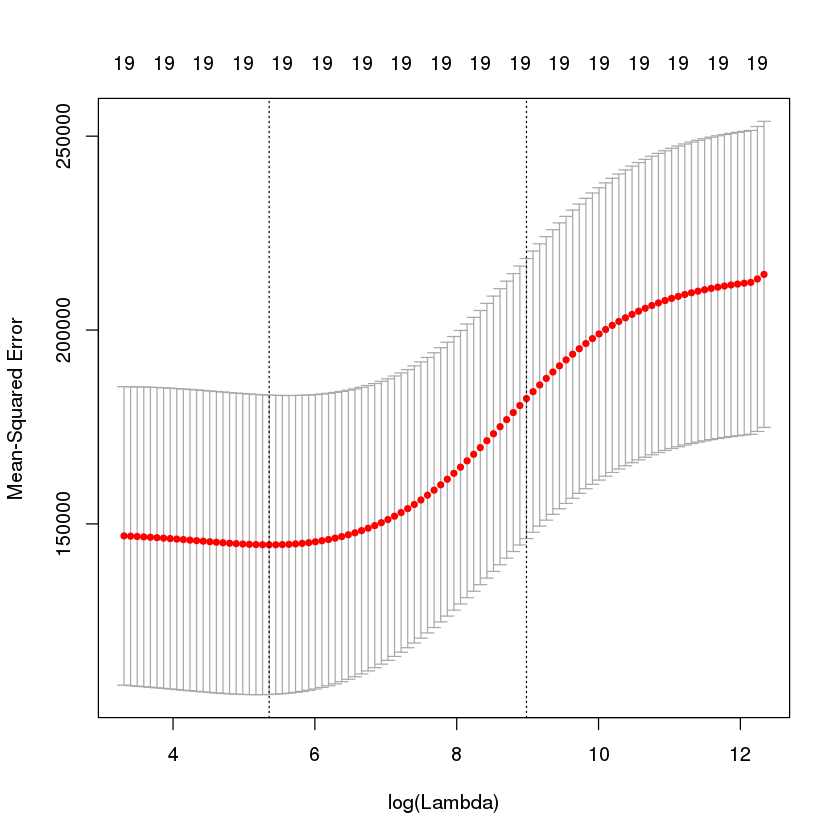

In [172]:
set.seed(1) # the choice of folds is random, so we want to set the seed to get reproduible results
cv.out=cv.glmnet(x[train,],y[train],alpha=0) #performs cross-validation, default is 10-fold
plot(cv.out)
bestlam=cv.out$lambda.min #find lambda with lowest MSE (cross-validation)
bestlam

What is the MSE associate with this $\lambda$?

In [173]:
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 96015.51

The coefficients:

In [175]:
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074383   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227527 -91.63411282   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208394

Note that none of the coefficeints are zero! Ridge regression does not perform variable selection.

### LASSO

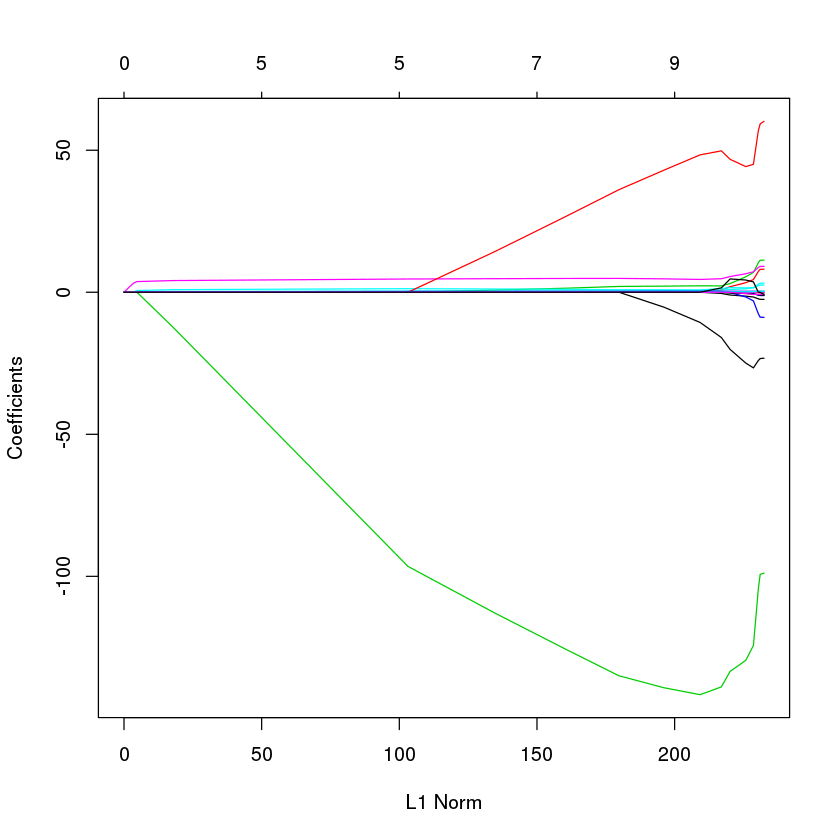

In [177]:
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

[1] 100743.4

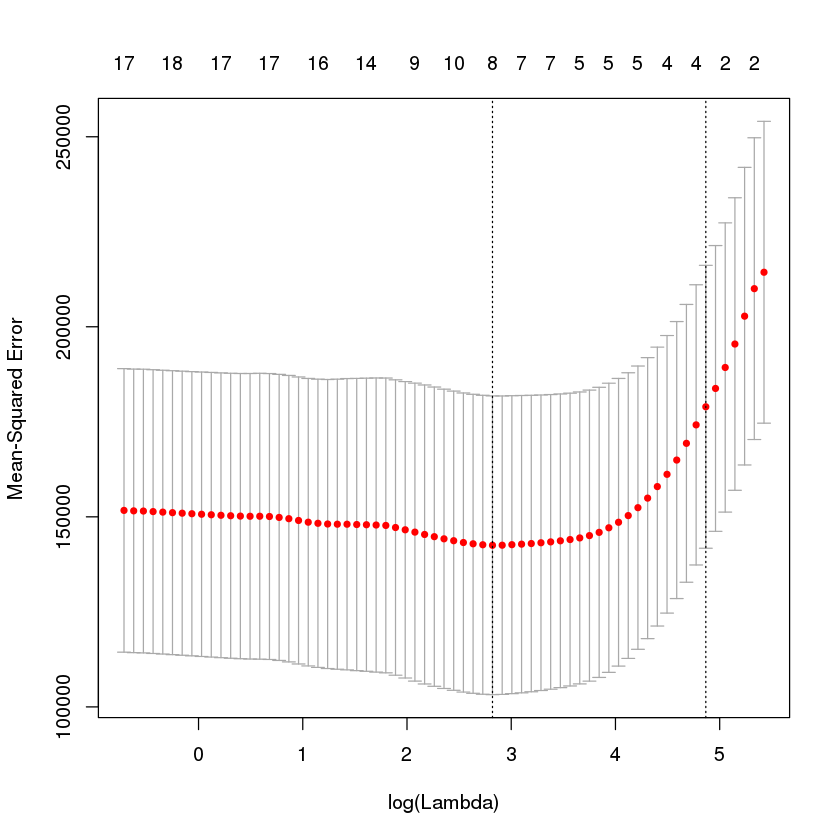

In [178]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)

This is substantially smaller than the null model, and close to the test error from ridge regression 

In [179]:
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

12 of 19 coefficents now have an estimate of zero.
The LASSO is *sparse* compared to ridge regression, and only contains seven variables.